# 16.6 Fine-Tuning BERT for Sequence-Level and Token-Level Applications

In the following, we generalize a subset of natural language processing applications as sequence- level and token-level. On the sequence level, we introduce how to transform the BERT repre- sentation of the text input to the output label in single text classification and text pair classifi- cation or regression. On the token level, we will briefly introduce new applications such as text tagging and question answering and shed light on how BERT can represent their inputs and get transformed into output labels. During fine-tuning, the “minimal architecture changes” required by BERT across different applications are the extra fully connected layers. During supervised learning of a downstream application, parameters of the extra layers are learned from scratch while all the parameters in the pretrained BERT model are fine-tuned.

## 16.6.1 Single Text Classification

Single text classification takes a single text sequence as input and outputs its classification result. Besides sentiment analysis that we have studied in this chapter, the Corpus of Linguistic Acceptability (CoLA) is also a dataset for single text classification, judging whether a given sentence is grammatically acceptable or not (Warstadt et al., 2019). For instance, “I should study.” is acceptable but “I should studying.” is not.

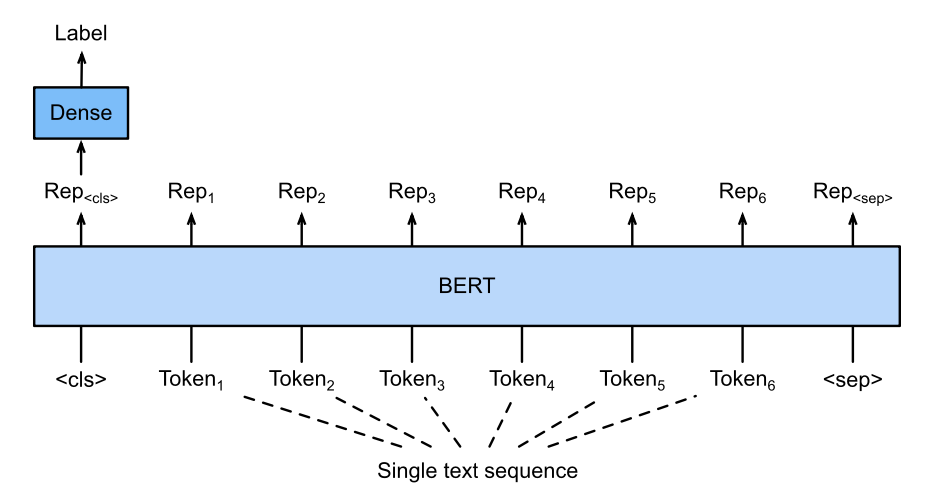

## 16.6.2 Text Pair Classification or Regression

We have also examined natural language inference in this chapter. It belongs to text pair classification, a type of application classifying a pair of text. Taking a pair of text as input but outputting a continuous value, semantic textual similarity is a popular text pair regression task. This task measures semantic similarity of sentences. For in- stance, in the Semantic Textual Similarity Benchmark dataset, the similarity score of a pair of sentences is an ordinal scale ranging from 0 (no meaning overlap) to 5 (meaning equivalence) (Cer et al., 2017). The goal is to predict these scores. Examples from the Semantic Textual Similarity Benchmark dataset include (sentence 1, sentence 2, similarity score):

 - “A plane is taking off.”, “An air plane is taking off.”, 5.000;
 - “A woman is eating something.”, “A woman is eating meat.”, 3.000;

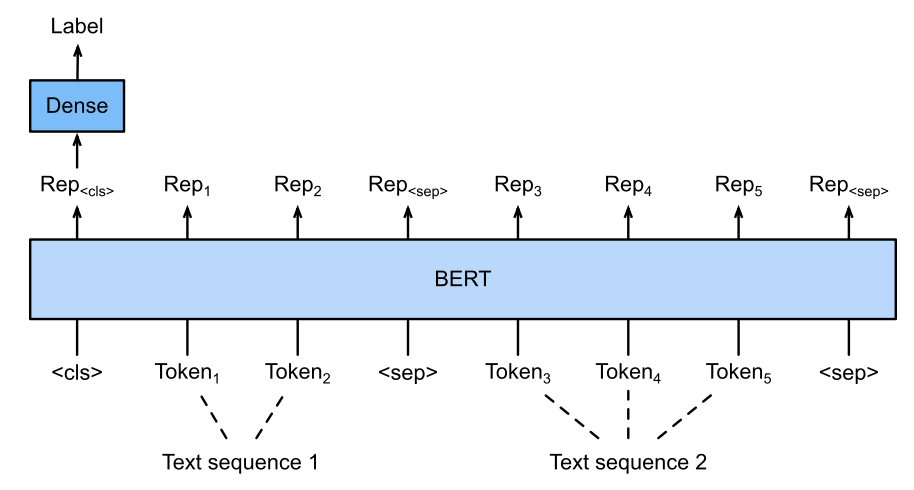

### 16.6.3 Text Tagging

Now let’s consider token-level tasks, such as text tagging, where each token is assigned a label. Among text tagging tasks, part-of-speech tagging assigns each word a part-of-speech tag (e.g., adjective and determiner) according to the role of the word in the sentence. For example, according to the Penn Treebank II tag set, the sentence “John Smith ‘s car is new” should be tagged as “NNP (noun, proper singular) NNP POS (possessive ending) NN (noun, singular or mass) VB (verb, base form) JJ (adjective)”. Fine-tuning BERT for text tagging applications is illustrated in Fig. 16.6.3. Comparing with Fig. 16.6.1, the only distinction lies in that in text tagging, the BERT representation of every token of the input text is fed into the same extra fully connected layers to output the label of the token, such as a part-of-speech tag.

### 16.6.4 Question Answering

As another token-level application, question answering reflects capabilities of reading com- prehension. For example, the Stanford Question Answering Dataset (SQuAD v1.1) consists of reading passages and questions, where the answer to every question is just a segment of text (text span) from the passage that the question is about (Rajpurkar et al., 2016). To explain, consider a passage “Some experts report that a mask’s efficacy is inconclusive. However, mask makers insist that their products, such as N95 respirator masks, can guard against the virus.” and a question “Who say that N95 respirator masks can guard against the virus?”. The answer should be the text span “mask makers” in the passage. Thus, the goal in SQuAD v1.1 is to predict the start and end of the text span in the passage given a pair of question and passage.

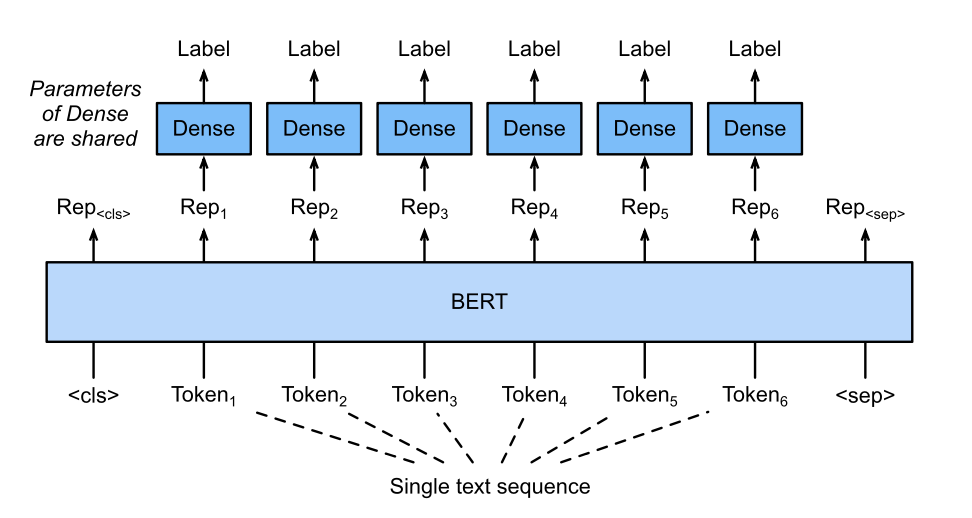

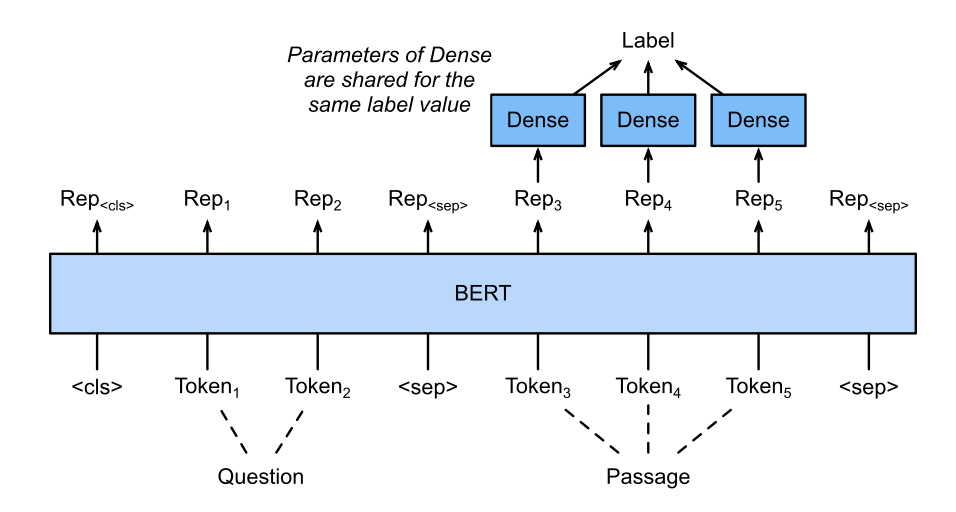

To fine-tune BERT for question answering, the question and passage are packed as the first and second text sequence, respectively, in the input of BERT. To predict the position of the start of the text span, the same additional fully connected layer will transform the BERT representation of any token from the passage of position i into a scalar score si . Such scores of all the passage tokens are further transformed by the softmax operation into a probability distribution, so that each token position i in the passage is assigned a probability pi of being the start of the text span. Predicting the end of the text span is the same as above, except that parameters in its additional fully connected layer are independent from those for predicting the start. When predicting the end, any passage token of position i is transformed by the same fully connected layer into a scalar score ei . Fig. 16.6.4 depicts fine-tuning BERT for question answering. For question answering, the supervised learning’s training objective is as straightforward as maximizing the log-likelihoods of the ground-truth start and end positions. When predicting the span, we can compute the score si + ej for a valid span from position i to position j (i ≤ j), and output the span with the highest score.